In [1]:
%pylab inline
from scipy.integrate import odeint
from ipywidgets import interact
figsize(12,5)

Populating the interactive namespace from numpy and matplotlib


# Quantum harmonic oscillator interactive

## Part 1
Let's play with possible wavefunctions for the quantum harmonic oscillator.  The block of code below allows you to plot what the wavefunction might look like with various parameters.

_Note:_ not all combinations of parameters give you allowable wavefunctions.  Keep in mind the normalization and what the wavefunction will look like for $x \rightarrow \pm \infty$.

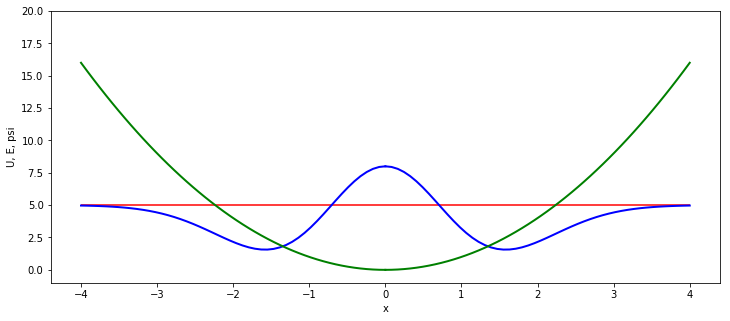

In [2]:
def f(k,E,f,show_legend):
    def U(x): #define potential function
        return k*x**2
    
    def tise(y,x): # define TISE as first-order ODE system
        psi,v = y
        dpsidx = v
        dvdx = -(E-U(x))*psi
        return dpsidx,dvdx
    
    # set up test conditions for first-order ODE system
    if f=="odd":
        y0 = [0.0,3.0]
    else:
        y0 = [1.0,0.0]
    
    # set up domain of simulation
    L = 2.0
    xL = 2*L
    xs = linspace(0,xL)
    
    # solve TISE
    ans = odeint(tise,y0,xs)
    
    # plot results
    sf = 3.0
    plot(xs,E+sf*ans[:,0],'b',label="psi (with E as psi=0)",linewidth=2)
    if f=="odd":
        plot(-xs,E-sf*ans[:,0],'b',linewidth=2)
    else:
        plot(-xs,E+sf*ans[:,0],'b',linewidth=2)
    hlines(E,-xL,xL,'r',label="E")
    ylim(-1,20)
    plot(xs,U(xs),'g',label="U(x)",linewidth=2)
    plot(-xs,U(-xs),'g',label="U(x)",linewidth=2)
    ylabel("U, E, psi")
    xlabel("x")
    if show_legend=="true":
        legend(loc='lower right')
    plt.show()

interact(f,k=(0.2,5),E=(0.0,20.0,0.01),f=["even","odd"],show_legend=["false","true"])

**Notes:**
- the function above assumes $\hbar^2/2m = 1$ for simplicity.
- if you're confused about what you're looking at, set `show_legend` to true.
- It turns out _all_ valid states for the QHO are either even or odd.  Try both.
- Keep in mind that allowable wavefunctions must be normalizable, i.e. the wavefunction must $\rightarrow 0$ as $x \rightarrow \pm \infty$.
- If $E < U(x)$, the wavefunction will be oscillate, while if $E > U(x)$, the wavefunction will be grow or decay.

Use the interactive above to answer the following questions.

### Question 1
With $k=1$, what is the energy of the lowest-energy allowed state, and is that state even or odd?

1.00 and it is even

### Question 2
With $k = 1$, what is the energy of the second-lowest-energy allowed state, and is that state even or odd?

3.00 at odd

### Question 3
With $k=1$ what is the pattern in the energies of allowed states?

The allowed states of energy are increasing odd numbers starting with f being even, then going to the next odd number in odd.

## Part 2
The block of come plots both the wavefunction and the probability density while also providing sliders to integrate between limits to determine probabilities.  To simplify things, the interactive assumes `k=1`.  Play around a bit...

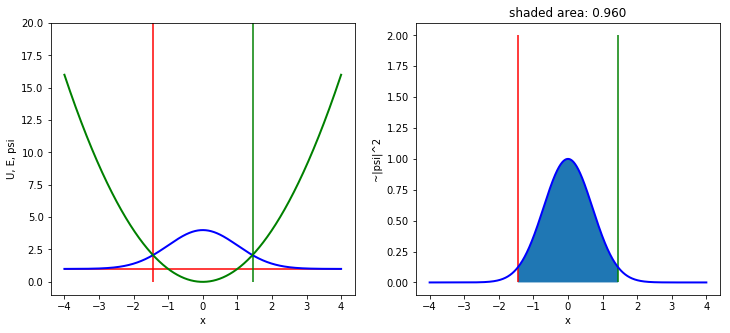

In [3]:
def f(E,f,a,b):
    def U(x): #define potential function
        return x**2
    
    def tise(y,x): # define TISE as first-order ODE system
        psi,v = y
        dpsidx = v
        dvdx = -(E-U(x))*psi
        return dpsidx,dvdx
    
    # set up test conditions for first-order ODE system
    if f=="odd":
        y0 = [0.0,3.0]
    else:
        y0 = [1.0,0.0]
    
    # set up domain of simulation
    L = 2.0
    xL = 2*L
    xs = linspace(0,xL,1000)
    
    # solve TISE
    ans = odeint(tise,y0,xs)
    
    xss = concatenate((-xs[-1::-1],xs))
    psi = ans[:,0]
    if f=="odd":
        psi = concatenate((-psi[-1::-1],psi))
    else:
        psi = concatenate((psi[-1::-1],psi))
    
    # plot results
    sf = 3.0
    subplot(121)
    plot(xss,E+sf*psi,'b',label="psi (with E as psi=0)",linewidth=2)
    hlines(E,-xL,xL,'r',label="E")
    ylim(-1,20)
    plot(xss,U(xss),'g',label="U(x)",linewidth=2)
    vlines([a,b],0,20,colors=['red','green'])
    ylabel("U, E, psi")
    xlabel("x")

    subplot(122)
    plot(xss,psi**2,'b',linewidth=2)
    fill_between(xss[(xss>=a) & (xss<=b)],psi[(xss>=a) & (xss<=b)]**2)
    vlines([a,b],0,2,colors=['red','green'])
    title("shaded area: %.3f"%(sum(psi[(xss>=a) & (xss<=b)]**2)/sum(psi**2)))
    ylabel("~|psi|^2")
    xlabel("x")
    plt.show()

interact(f,E=(1,17),a=(-4.0,4.0,0.01), b=(-4.0,4.0,0.01),f=["even","odd"])

The title of the plot at the right gives the integral of the normalized wavefunction between `a` and `b`.

Use the interactive(s) above to answer the following questions.

### Question 4
For `k=1` (assumed by the second interactive) and the lowest allowed energy, what is the probability the particle will be found on the right side of the oscillator? (i.e. for $x>0$)

P =.502

### Question 5
For the second-lowest allowed energy level, what is the probability the particle will be found in the region where $E > U(x)$?

P = .009

### Question 6
For the lowest allowed energy, what is the probability the particle will be found in the classically forbidden region? (i.e. $E < U(x)$)

P = .960